# 量子傅里叶变换

在本教程中,我们介绍量子傅里叶变换(QFT)，推导线路，并使用DeepQuantum实现它。我们将展示如何在模拟器和五比特设备上运行QFT。

## 1. 简介

傅里叶变换广泛应用于经典计算的多个领域，如信号处理、数据压缩和复杂性理论。量子傅里叶变换（QFT）是傅里叶变换在量子计算中的实现，它对波函数幅度进行离散傅里叶变换。QFT是许多量子算法的核心组件，最著名的应用包括Shor的因式分解算法和量子相位估计算法。

离散傅里叶变换将向量 $(x_0,...,x_{N-1})$ 映射为向量 $(y_0,...,y_{N-1})$ ，变换公式为:

$$y_k=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

其中$\omega_N^{jk}=e^{2\pi i\frac{jk}{N}}$。

类似地，量子傅里叶变换作用于量子态 $\vert X\rangle=\sum_{j=0}^{N-1}x_j\vert j\rangle$ ，并根据以下公式将其映射到量子态 $\vert Y\rangle=\sum_{k=0}^{N-1}y_k\vert k\rangle$ ：

$$y_k=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$ 

请注意，只有状态的幅度受到这个变换的影响。

这也可以表示为映射:

$$\vert j\rangle\mapsto\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk}\vert k\rangle$$

或酉矩阵:

$$U_{QFT}=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}\omega_N^{jk}\vert k\rangle\langle j\vert$$

## 2. 直观理解

量子傅里叶变换（QFT）在计算基和傅里叶基之间进行变换。H门是单比特QFT，它在Z基态 $|0\rangle$ 和 $|1\rangle$ 与X基态 $|{+}\rangle$ 和 $|{-}\rangle$ 之间进行变换。QFT是在这些基之间进行变换的函数。

$$
|\text{计算基态}\rangle\quad\xrightarrow[]{\text{QFT}}\quad|\text{傅里叶基态}\rangle
$$

$$
\text{QFT}|x\rangle=|\widetilde{x}\rangle
$$

我们通常使用波浪号(~)表示傅里叶基态。

## 3. 示例1: 1-qubit QFT

让我们考虑上文定义的QFT算子如何作用于单量子比特态$\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$。在这种情况下，我们有$x_0 = \alpha$，$x_1 = \beta$，以及$N = 2$。那么，

$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$

$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$

最终结果为态

$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$

这一操作恰好等同于对量子比特应用Hadamard算子（ $H$ ）:

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

如果我们将 $H$ 算子作用于态 $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$ ，将得到新的态:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$

注意Hadamard门如何对态的振幅执行了 $N=2$ 的离散Fourier变换。

## 4. 量子Fourier变换

当 $N$ 取更大值时，量子Fourier变换会是什么样子？让我们推导 $N=2^n$ 时的变换 $QFT_N$ ，它作用于态 $\vert x \rangle = \vert x_1\ldots x_n \rangle$ ，其中 $x_1$ 为最高有效位。

$\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle （~\text{其中}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{，}\: N = 2^n ）
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:（\text{分数二进制记数法}\: y = y_1\ldots y_n，y/2^n = \sum_{k=1}^n y_k/2^k ）
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:（\text{将和的指数展开为指数的乘积}） 
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:（\text{重新排列总和和乘积} ）
\\
& = \frac{1}{\sqrt{N}}\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right)
\end{aligned}$

## 5. 实现量子Fourier变换的电路

实现QFT的电路使用两种门。第一个是你已经知道的单量子比特Hadamard门 $H$ 。从示例1的讨论中，你已经看到 $H$ 作用于单量子比特态 $\vert x_k\rangle$ 的效果为

$$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle\right)$$

第二个是两量子比特受控旋转门$CROT_k$，它的分块对角形式为

$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

其中

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

$CROT_k$作用于两量子比特态$\vert x_l x_j\rangle$ （第一个量子比特为控制位，第二个为目标位）的效果为

$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$

$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$

有了这两个门，实现n-qubit QFT的线路如下图所示。

<div style="margin-right: 15px; border-radius: 10px; background-color: rgb(255， 255， 255); text-align: center;">
    <img src="./images/qft.png" width="60%"/>
    <p style="padding: 10px; font-size: small; text-align: center; line-height: 0%;">
        <b>
    </p>
</div>

首先，我们从一个 n 量子比特的输入态 $\vert x_1x_2\ldots x_n\rangle$ 开始。

1. 在对量子比特 1 进行第一个 Hadamard 门操作后，态由输入态转变为:

   $$
   H_1\vert x_1x_2\ldots x_n\rangle = 
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
   \otimes
   \vert x_2x_3\ldots x_n\rangle
   $$

2. 在由量子比特 2 控制对量子比特 1 进行 $UROT_2$ 门操作后，态转变为:

   $$
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
   \otimes
   \vert x_2x_3\ldots x_n\rangle
   $$

3. 在由量子比特 $n$ 控制对量子比特 1 应用最后一个 $UROT_n$ 门后，态变为:

   $$
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^n}x_n + 
   \frac{2\pi i}{2^{n-1}}x_{n-1} + 
   \ldots + 
   \frac{2\pi i}{2^2}x_2 + 
   \frac{2\pi i}{2}x_1
   \right)
   \vert1\rangle\right]
   \otimes
   \vert x_2x_3\ldots x_n\rangle
   $$

   注意到:

   $$
   x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
   $$

   我们可以将上述态写作:

   $$
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^n}x 
   \right)
   \vert1\rangle\right]
   \otimes
   \vert x_2x_3\ldots x_n\rangle
   $$

4. 在对量子比特 $2\ldots n$ 应用类似的门序列后，我们发现最终态为:

   $$
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^n}x 
   \right)
   \vert1\rangle\right]
   \otimes
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^{n-1}}x 
   \right)
   \vert1\rangle\right]
   \otimes
   \ldots
   \otimes
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^{2}}x 
   \right)
   \vert1\rangle\right]
   \otimes
   \frac{1}{\sqrt{2}}
   \left[\vert0\rangle + 
   \exp\left(
   \frac{2\pi i}{2^{1}}x 
   \right)
   \vert1\rangle\right]
   $$

这正是如上文所述的输入态的量子傅里叶变换。

总之，该线路通过一系列受控旋转门和 Hadamard 门的巧妙组合，实现了对任意 n 量子比特态的量子傅里叶变换。关键在于利用二进制展开将输入态表示为相位因子的线性组合，并利用受控旋转门逐步构建出所需的相位。最终，量子比特的测量结果即对应于傅里叶变换的输出。

## 6. 示例 2: 3量子比特的QFT

生成量子电路 $\vert y_3y_2y_1\rangle = QFT_8\vert x_3x_2x_1\rangle$ 的步骤如下:

1. 对 $\vert x_1 \rangle$ 应用 Hadamard 门

$$
|\psi_1\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_1\right) 
\vert1\rangle\right]
$$

2. 根据 $\vert x_2\rangle$ 对 $\vert x_1\rangle$ 应用 $UROT_2$ 门

$$
|\psi_2\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

3. 根据 $\vert x_3\rangle$ 对 $\vert x_1\rangle$ 应用 $UROT_3$ 门 

$$
|\psi_3\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

4. 对 $\vert x_2 \rangle$ 应用 Hadamard 门

$$
|\psi_4\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

5. 根据 $\vert x_3\rangle$ 对 $\vert x_2\rangle$ 应用 $UROT_2$ 门

$$
|\psi_5\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

6. 对 $\vert x_3\rangle$ 应用 Hadamard 门

$$
|\psi_6\rangle = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

7. 注意输出态的顺序与期望的QFT结果相反。因此，我们需要交换量子比特的顺序（本例中交换 $y_1$ 和 $y_3$）。

## 7. QFT线路形式的一些注意事项

上述例子展示了一种非常实用的 $N=2^n$ 的QFT线路形式。值得注意的是，只有最后一个量子比特依赖于所有其他输入量子比特的值，而每一个更高位的量子比特对输入量子比特的依赖程度逐渐减小。这一点在QFT的物理实现中非常重要，因为相邻量子比特之间的耦合比远距离量子比特之间的耦合更容易实现。

此外，随着QFT线路规模的增大，会花费越来越多的时间进行越来越细微的旋转。事实证明，我们可以忽略低于某个阈值的旋转，仍然能够获得不错的结果，这就是所谓的近似QFT。这在物理实现中也很重要，因为减少操作次数可以大大降低退相干和潜在的门错误。


# 8. DeepQuantum实现QFT线路

上述讨论中使用的 $CROT$ 门的实现是一个受控相位旋转门。这个门定义为:

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

因此，从上面讨论中的 $CROT_k$ 门到 $CP$ 门的映射可以通过下面的等式找到：

$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

我们现在将在DeepQuantum中创建一个通用的QFT电路。先构建一个实现QFT的电路，其中量子比特是颠倒的。

这段代码定义了一个名为 `QuantumFourierTransform` 的类，它继承自 `dq.Ansatz` 类。这个类实现了量子傅里叶变换（Quantum Fourier Transform，QFT）线路。

类的构造函数 `__init__` 接受以下参数：
- `nqubit`：量子比特数。
- `minmax`：量子比特的范围，默认为 `None`。
- `reverse`：是否执行逆向 QFT，默认为 `False`。
- `init_state`：初始状态，默认为 `'zeros'`。
- `den_mat`：是否使用密度矩阵模拟，默认为 `False`。
- `mps`：是否使用矩阵乘积态（Matrix Product State，MPS）模拟，默认为 `False`。
- `chi`：MPS 的 bond dimension，默认为 `None`。
- `show_barrier`：是否显示barrier，默认为 `False`。

In [15]:
from typing import Any, List, Optional, Union
import torch 
import deepquantum as dq

class QuantumFourierTransform(dq.Ansatz):
    def __init__(
        self,
        nqubit: int,
        minmax: Optional[List[int]] = None,
        reverse: bool = False,
        init_state: Any = 'zeros',
        den_mat: bool = False,
        mps: bool = False,
        chi: Optional[int] = None,
        show_barrier: bool = False
    ) -> None:
        super().__init__(nqubit=nqubit, wires=None, minmax=minmax, ancilla=None, controls=None,
                         init_state=init_state, name='QuantumFourierTransform', den_mat=den_mat,
                         mps=mps, chi=chi)
        self.reverse = reverse
        for i in self.wires:
            self.qft_block(i)
            if show_barrier:
                self.barrier(self.wires)
        if not reverse:
            for i in range(len(self.wires) // 2):
                self.swap([self.wires[i], self.wires[-1 - i]])

    def qft_block(self, n):
        self.h(n)
        k = 2
        for i in range(n, self.minmax[1]):
            self.cp(i + 1, n, torch.pi / 2 ** (k - 1))
            k += 1

以下分别是3个量子比特和4个量子比特的QFT线路：

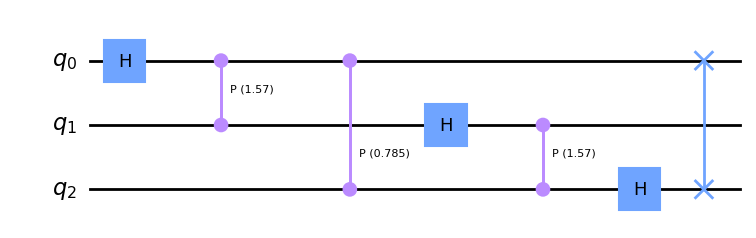

In [20]:
qft = QuantumFourierTransform(nqubit=3, minmax=[0, 2])
qft.draw()

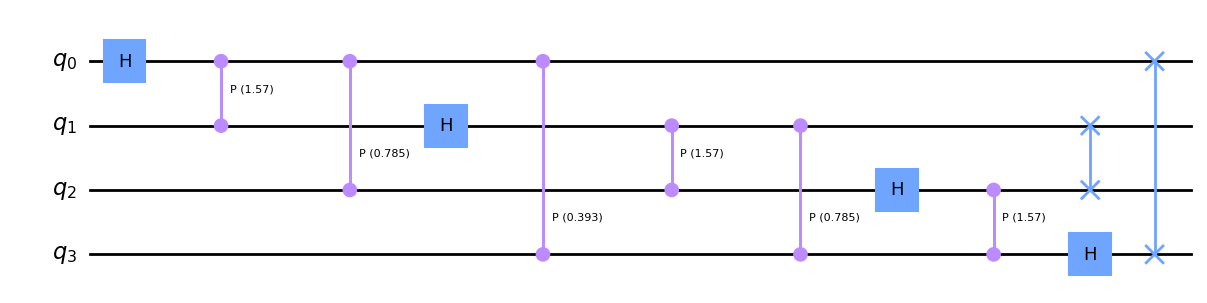

In [24]:
qft = QuantumFourierTransform(nqubit=4, minmax=[0, 3])
qft.draw()